In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import make_classification

In [5]:
X,y=make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1,n_redundant=0, random_state=42)

In [6]:
X

array([[ 0.60103418,  1.5353525 ],
       [ 0.75594526, -1.1723519 ],
       [ 1.35447877, -0.94852841],
       ...,
       [ 2.84431506,  0.21129354],
       [-0.02587554,  1.6192578 ],
       [ 3.64147835,  0.75692519]], shape=(1000, 2))

In [7]:
y

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,

In [8]:
pd.DataFrame(X)[0]

0      0.601034
1      0.755945
2      1.354479
3      3.103090
4      0.753178
         ...   
995    1.713939
996    1.509473
997    2.844315
998   -0.025876
999    3.641478
Name: 0, Length: 1000, dtype: float64

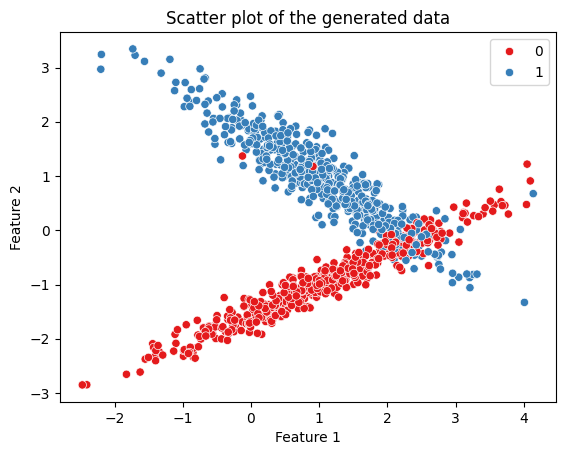

In [12]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of the generated data')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.svm import SVC

In [15]:
svc = SVC(kernel='linear', C=1.0)
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [16]:
y_pred = svc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       104
           1       0.99      0.85      0.92        96

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200

[[103   1]
 [ 14  82]]


In [19]:
rbf= SVC(kernel='rbf', C=1.0)
rbf.fit(X_train, y_train)
y_pred_rbf = rbf.predict(X_test)

In [21]:
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred))

[[103   1]
 [ 12  84]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       104
           1       0.99      0.85      0.92        96

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['rbf'],
    'gamma': [1,0.1,0.01,0.001, 0.0001]
}

In [27]:
grid=GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose=3, cv=5, n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [28]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [29]:
##prediction 
y_pred4 = grid.predict(X_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       104
           1       0.97      0.91      0.94        96

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

[[101   3]
 [  9  87]]
